# FIT5196 Assessment 3
#### Student Name: Potluri Karthik Venkat Chowdary
#### Student ID: 32157738

Version: 1.0

Environment: Python 3.7 and Jupyter notebook

Libraries used:
* pandas (used for data manipulation and analysis) 
* BeautifulSoup (used for xml parsing)
* shapefile (for shapefile parsing)
* shapely (for polygon extraction and point identification)
* json (used for json parson)
* numpy (used for mathematical array manipulation) 
* math (used for mathematical calculation)  
* sklearn (used for regression and sampling)
* seaborn (for plotting)
* matplotlib (for plotting)
* Stats (for boxcox transformation)

# Data Integration

## Introduction
Data integration is the process of consolidating data from different sources. Data integration is often a prerequisite to other processes including analysis, reporting, and forecasting *(What Is Data Integration? Examples and Use Cases, n.d.)*. The sources can be very different such as different formats of files, or different databases. Our target would be to integrate them in such a way that it helps the data easier to use.

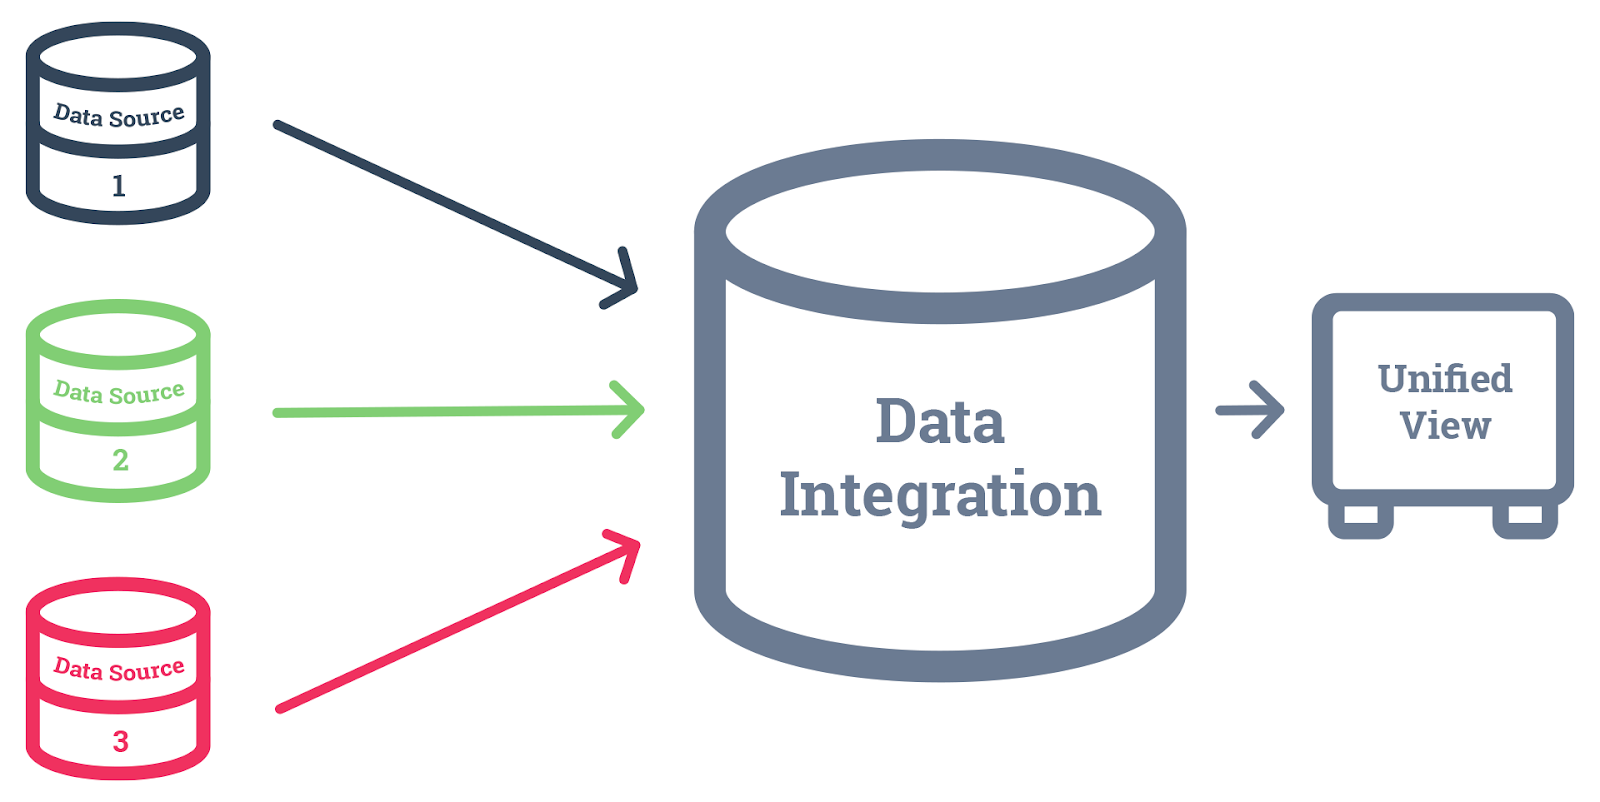


## Data Description

The data provided has information regarding properties that have been sold in melbourne. It has details such as price, bedrooms, year of sale, latitude, longitude etc., Then we have various other information for Melbourne such as Schools and their locations, Hospitals and their locations, Recreation centres and their locations. 

Apart from these we have shape files which have suburb information across melbourne and PTV data which have public transport information such as stops, services, their schedule etc.,

## Libraries

The libraries used in these are pandas (for data mainpulation and analysis), Beautiful soup (for XML parsing), Shapefile (for parsing shapefiles), Shapely (for polygon extraction and point identification), json (for json parsing), Math (for solving mathematical problems), Seaborn and matlplotlib (For plotting), numpy (for mathematical array manipulation), sklearn (for linear models)

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bsoup # for xml

import shapefile
import shapely
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import json

import math

# plotting libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Parsing and Reading data

In this project we are extracting data from multiple sources and integrate them into a single data that can be used for data analysis. Hence, each file is parsed to extract information and store it so that it can be integrated.

### 1) Real Estate data

Let's start with real estate data,  Realestate information is split into to different files, one CSV and one XML file. We can start with CSV file as it would give an idea about what it constitutes so that we can parse the XML file better.

- **CSV File**
  - File name is ```real_estate_data.csv``` we will parse it using read_csv function of pandas into a data frame *df_re_csv*.

In [2]:
#Parsing the csv file
df_re_csv = pd.read_csv('./RD/real_estate_data.csv')
#df_re_csv.head()

We can see that each property has an index,  a property id, latitude and longitude, address, price, property_type, year, bedrooms, bathrooms, parking_space. Our next task would be to extract similar rows from the XML file and add it to the existing dataframe.

- **XML File**
 - We will be using beautiful soup to parse the information into a variable soup
 - We will search for each column in the soup and then get the children for the matches and form a list
 - Once we made lists for each column, we can join them all into one single dataframe ```df_re_xml```



In [3]:
soup = bsoup(open("./RD/real_estate_data.xml"),"lxml-xml") 

# Store each xml tag value in a list
#Index
index = []
for stat in soup.find_all("index"):
    for childs in stat.findChildren():
        index.append(float(childs.text))
        
# Property_id 
property_id = []
for stat in soup.find_all("property_id"):
    for childs in stat.findChildren():
        property_id.append(float(childs.text))

# Latitude

lat = []
for stat in soup.find_all("lat"):
    for childs in stat.findChildren():
        lat.append(float(childs.text))

# Longitude

lng = []
for stat in soup.find_all("lng"):
    for childs in stat.findChildren():
        lng.append(float(childs.text))

# ddress

addr_street = []
for stat in soup.find_all("addr_street"):
    for childs in stat.findChildren():
        addr_street.append(childs.text)

# Price

price = []
for stat in soup.find_all("price"):
    for childs in stat.findChildren():
        price.append(float(childs.text))

#Property type

property_type = []
for stat in soup.find_all("property_type"):
    for childs in stat.findChildren():
        property_type.append(childs.text)

# Year

year = []
for stat in soup.find_all("year"):
    for childs in stat.findChildren():
        year.append(float(childs.text))

# Bedrooms

bedrooms = []
for stat in soup.find_all("bedrooms"):
    for childs in stat.findChildren():
        bedrooms.append(float(childs.text))

# Bathrooms

bathrooms = []
for stat in soup.find_all("bathrooms"):
    for childs in stat.findChildren():
        bathrooms.append(float(childs.text))

#Parking Space

parking_space = []
for stat in soup.find_all("parking_space"):
    for childs in stat.findChildren():
        parking_space.append(float(childs.text))

In [4]:
# Integrating the lists into a single data frame

df_re_xml = pd.DataFrame(
    {'index': index,
     'property_id': property_id,
     'lat': lat,
     'lng': lng,
     'addr_street': addr_street,
     'price': price,
     'property_type': property_type,
     'year': year,
     'bedrooms': bedrooms,
     'bathrooms': bathrooms,
     'property_id': property_id,
     'parking_space': parking_space
    })
#df_re_xml.head()

Now that we have parsed information from the XML file and csv file, we can join them into a single file and remove duplicates if there are any.

In [5]:
# Merge xml and json using property_id as index to form main property data 
df_re = pd.concat([df_re_xml,df_re_csv]).reset_index(drop=True)
# df_realstate.head()

In [6]:
#changing year to integer
df_re.year = df_re.year.astype(int)
df_re.bedrooms = df_re.bedrooms.astype(int)
df_re.bathrooms = df_re.bathrooms.astype(int)
df_re.parking_space = df_re.parking_space.astype(int)
df_re.index = df_re.index.astype(int)
df_re['index'] = df_re['index'].astype(int)
df_re.property_id = df_re.property_id.astype(int)
df_re.price = df_re.price.astype(float)
#df_re.bedrooms

In [7]:
df_re.lat = df_re.lat.round(6)
df_re.lng = df_re.lng.round(6)

In [8]:
#Removing duplicates
duplicateDf = df_re[df_re.duplicated()]
print("Total number of duplicated rows are:", len(duplicateDf))
df_re.drop_duplicates(inplace=True)
df_re.reset_index(drop=True)

Total number of duplicated rows are: 4


,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1
1,304500,78275,-37.925779,145.189811,62 Waverley Park Drive,16320000.0,house,2015,3,2,2
2,24193,61360,-37.805980,145.228415,16 Kennedy Avenue,12726000.0,house,2016,3,2,2
3,279930,45427,-37.714489,145.108658,7 Lodge Street,7070000.0,house,2014,4,2,2
4,282175,43578,-37.711800,145.092444,2 Yerrawa Drive,9520000.0,house,2014,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1991,261589,33090,-37.736191,145.006718,67 Wilcox Street,6408000.0,house,2012,3,1,2
1992,366845,18037,-37.673777,144.926299,11 Clunes Avenue,5200000.0,house,2015,3,1,0
1993,332812,42414,-37.747504,145.066186,58 St James Road,9075000.0,house,2016,3,1,1
1994,404393,3967,-37.822006,144.872574,93 Benbow Street,8710000.0,house,2009,3,2,2


In [9]:
df_re.lat[0]

-37.755701

### 2) Suburb data

Now that we have the real estate information about all the houses the next would be suburb information. Suburb information is present in shape files. There are 4 files included in the shapefiles shx, shp, dbf, prj. Each file has its own purpose (Wikipedia contributors, 2021b).

- ```shx``` - shape format; the feature geometry itself
- ```shp``` - shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly
- ```dbf``` - attribute format; columnar attributes for each shape, in dBase IV format 
- ```prj``` - projection description, using a well-known text representation of coordinate reference systems 

The 'record' and 'shapes' are extracted from the shapefiles using the shapefile library. 

In [10]:
# extracting shapefiles
sf = shapefile.Reader("./vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp")
recs = sf.records()
shapes = sf.shapes()
# len(recs),len(shape/s)

In [11]:
len(recs),len(shapes)

(2973, 2973)

In [12]:
recs[0]

Record #0: ['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']

We can see that the suburb name is the $ 7^{th} $ item. For each property, the coordinates are taken as points and he coordinates of the shapes are taken as polygons. A simple contain() operator can check if the point is present in the polygon. When a point is identified inside the polygon, the index of the polygon is used to extract the record from the records list. 

In [13]:
suburbs = []
for a,b in zip(df_re.lng, df_re.lat): 
    point = Point(a,b)
    for i in range(len(shapes)):
        polygon = Polygon(shapes[i].points)
        if polygon.contains(point):
            suburbs.append(recs[i][6])
            break

In [14]:
suburb_list = [i.title() for i in suburbs]

Check if the number of suburbs extracted is same as the number of rows and add the suburb list as a new column.

In [15]:
print("Total suburbs extracted: ",len(suburb_list),"; Total properties available:",len(df_re))

# store suburb column in the main df
df_re['suburb'] = suburb_list

Total suburbs extracted:  1996 ; Total properties available: 1996


### 3) Schools

Now that we are completed with suburbs and assigned suburbs to each property next we will go with schools. School information is present in a Json file.

- **Json File** - Json file can be parsed using the json.load() function and use pandas to convert into a dataframe named 'df_school'.

In [16]:
# Extract data from JSON
with open("./RD/School.json") as json_file:
    json_data = json.load(json_file)

# Store data as dataframe
df_school = pd.DataFrame(json_data)
df_school.head()

,School_ID,School_Name,Long,Lat
0,12,Warrandyte Primary School,145.21,-37.74
1,77,Sacred Heart School,144.88,-37.84
2,78,St Mary's School,144.90,-37.86
3,84,Cheltenham Primary School,145.05,-37.96
4,253,Footscray Primary School,144.89,-37.79


**Distance Function**

Going forward we need to create a distance function that will calculate the distances given the co-ordinates. We can use this in calculating distances in other areas too. it takes latitudes and longitudes of both property and school and gives the distance

In [17]:
def distance(prop_lat,prop_long,school_lat,school_long):
    R = 6371
    lat1 = math.radians(prop_lat)
    lon1 = math.radians(prop_long)
    lat2 = math.radians(school_lat)
    lon2 = math.radians(school_long)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return(distance)

- Now we can merge both the dataframes df_re and df_school and get a dataframe with all possible combinations. 
- Once we get this we can add the distance to various combinations to a new column ```Distance_to_school```. 
- We can then filter out the rows that have the least distance and dropping the remaining. 
- For this we would be using column named index as the unique id. 
- Once we redid that we can remove the extra columns school name, school latitude and longitude.
- Save it into a new dataframe df_re2, by creating multiple dataframes for the process if there is any issue we would not need to run the whole information again.

In [18]:
#merging the two dataframes with all possible combinations.
df_school['key'] = 1
df_re['key'] = 1
df_newcombo = pd.merge(df_re,df_school,on='key').drop('key',axis=1)
df_newcombo.head(5)

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_ID,School_Name,Long,Lat
0,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1,Lilydale,12,Warrandyte Primary School,145.21,-37.74
1,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1,Lilydale,77,Sacred Heart School,144.88,-37.84
2,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1,Lilydale,78,St Mary's School,144.90,-37.86
3,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1,Lilydale,84,Cheltenham Primary School,145.05,-37.96
4,42603,67659,-37.755701,145.368297,7 Marana Close,6160000.0,house,2014,3,2,1,Lilydale,253,Footscray Primary School,144.89,-37.79


In [19]:
#calculating all possible combination distances.
distance_list = []
for i in range(len(df_newcombo)):
    distance_list.append(distance(df_newcombo['lat'][i]
                                  ,df_newcombo['lng'][i],df_newcombo['Lat'][i],df_newcombo['Long'][i]))

# Appending the list as a column
df_newcombo['Distance_to_school'] = distance_list

In [20]:
#grouping based on minimum value for each index.
df_newcombo = df_newcombo[df_newcombo['Distance_to_school'] == df_newcombo.groupby('index')
                          ['Distance_to_school'].transform('min')]


df_newcombo = df_newcombo.sort_values('Distance_to_school').drop_duplicates('index').reset_index(drop=True)

In [21]:
#Removing extra columns
df_re2 = df_newcombo.drop(columns=['School_Name','Long','Lat'])

In [22]:
df_re2.head()

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_ID,Distance_to_school
0,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071
1,223251,85942,-37.920358,144.989771,10 Norwood Avenue,32000000.0,house,2011,3,3,2,Brighton,1134,0.044589
2,64620,14608,-37.749451,144.900162,55 Hedderwick Street,9090000.0,house,2008,3,2,3,Essendon,1513,0.062686
3,360892,18210,-37.690595,144.919872,144 Graham Street,2424000.0,house,2013,4,1,0,Broadmeadows,2080,0.067113
4,408677,89438,-37.959381,145.020401,3 Spring Street,10835000.0,house,2008,4,2,2,Sandringham,3631,0.077288


### 4) Hospitals

Now that we have completed the school part let us go with hospitals. Hospitals information is present in an html file named ```hospital.html```. 

- **html files** - We will use the *'read_html'* function of pandas to read the html.

We will then save it into the dataframe *'df_hosp'*.

In [23]:
dfs = pd.read_html('./RD/hospital.html',index_col=0)
df_hosp=dfs[0].reset_index()
df_hosp.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


We can follow the procedure we have followed earlier with schools and even use the same distance function to calculate the nearest hospital for each property.

- Now we can merge both the dataframes df_re2 and df_hosp and get a dataframe with all possible combinations. 
- Once we get this we can add the distance to various combinations to a new column ```Distance_to_hospital```. 
- We can then filter out the rows that have the least distance and dropping the remaining. 
- For this we would be using column named index as the unique id. 
- Once we did that we can remove the extra columns hospital name, hospital latitude and longitude.
- Save it into a new dataframe df_re3, by creating multiple dataframes for the process if there is any issue we would not need to run the whole information again.

In [24]:
#merging the two dataframes with all possible combinations.
df_hosp['key'] = 1
df_re2['key'] = 1
df_newcombo = pd.merge(df_re2,df_hosp,on='key').drop('key',axis=1)
df_newcombo.head(5)

,index,property_id,lat_x,lng_x,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_ID,Distance_to_school,id,lat_y,lng_y,name
0,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071,hospital_001,-37.990622,145.072836,Como Private Hospital
1,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071,hospital_003,-37.792230,144.889128,Western Hospital
3,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,181324,47446,-37.709858,145.139569,68 Ryans Road,9425000.0,house,2013,3,2,2,Eltham,1275,0.041071,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [25]:
#calculating all possible combination distances.
distance_list = []
for i in range(len(df_newcombo)):
    distance_list.append(distance(df_newcombo['lat_x'][i]
                                  ,df_newcombo['lng_x'][i],df_newcombo['lat_y'][i],df_newcombo['lng_y'][i]))

# Appending the list as a column
df_newcombo['Distance_to_hospital'] = distance_list

In [26]:
#grouping based on minimum value for each index.
df_newcombo = df_newcombo[df_newcombo['Distance_to_hospital'] == df_newcombo.groupby('index')
                          ['Distance_to_hospital'].transform('min')]


df_newcombo = df_newcombo.sort_values('Distance_to_hospital').drop_duplicates('index').reset_index(drop=True)

In [27]:
#Removing extra columns
df_re3 = df_newcombo.drop(columns=['name','lat_y','lng_y'])
df_re3.head()

,index,property_id,lat_x,lng_x,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_ID,Distance_to_school,id,Distance_to_hospital
0,60096,38625,-37.763025,145.030910,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972
1,107862,68742,-37.864220,145.029084,11 Evandale Road,9840000.0,house,2010,3,2,2,Malvern,7650,6.424553,hospital_092,0.091329
2,275598,33471,-37.718373,144.998495,1/62 Pine Street,2784000.0,house,2010,2,1,2,Reservoir,8895,3.157711,hospital_139,0.097381
3,213445,53591,-37.811759,145.003607,63 Baker Street,15820000.0,house,2016,3,1,1,Richmond,7842,10.270584,hospital_134,0.104184
4,296339,83927,-37.855434,144.999476,36 Lewisham Road,11484000.0,house,2015,2,1,0,Windsor,1025,7.179559,hospital_012,0.107169


In [28]:
#changing names to original requirements
df_re3.rename(columns = {'lat_x':'lat','lng_x':'lng','id':'Hospital_id','School_ID':'School_id'}, inplace = True)

### 5) Recreation Centres

Next we will be doing recreation centres, Recreation centre information is present in an excel workbook. Excel workbook can be parsed using the read_excel function of pandas. Once we extract the information we will use the similar process from earlier to get the nearest recreation centre and distance.

In [29]:
# parsing Rec.Centre excel
df_recr = pd.read_excel('./RD/Recreation_centres.xlsx',index_col=0).reset_index()

In [30]:
df_recr

,RC_ID,RC_Name,Latitude,Longitude
0,MITCHE3674,Vermont South Club,-37.851683,145.180228
1,BANYUL2628,Genesis Bundoora,-37.684267,145.071665
2,BANYUL12795,Anthony Beale Reserve,-37.691447,145.126294
3,BANYUL12822,Greensborough Park,-37.700383,145.106353
4,BANYUL12854,Whatmough Park,-37.699948,145.104116
...,...,...,...,...
291,WHITTL9553,HR Uren Reserve,-37.683549,144.989355
292,WHITTL9536,Partridge recreation reserve,-37.662124,145.023178
293,WHITTL9552,RGC Cook Reserve,-37.672757,144.989574
294,WHITTL9554,Barry Road Tennis Courts & community active ce...,-37.670957,144.997786


In [31]:
#merging the two dataframes with all possible combinations.
df_recr['key'] = 1
df_re3['key'] = 1
df_newcombo = pd.merge(df_re3,df_recr,on='key').drop('key',axis=1)
df_newcombo.head(5)

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_id,Distance_to_school,Hospital_id,Distance_to_hospital,RC_ID,RC_Name,Latitude,Longitude
0,60096,38625,-37.763025,145.03091,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972,MITCHE3674,Vermont South Club,-37.851683,145.180228
1,60096,38625,-37.763025,145.03091,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972,BANYUL2628,Genesis Bundoora,-37.684267,145.071665
2,60096,38625,-37.763025,145.03091,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972,BANYUL12795,Anthony Beale Reserve,-37.691447,145.126294
3,60096,38625,-37.763025,145.03091,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972,BANYUL12822,Greensborough Park,-37.700383,145.106353
4,60096,38625,-37.763025,145.03091,141 Ford Street,12600000.0,house,2013,3,1,2,Ivanhoe,2110,8.562987,hospital_039,0.039972,BANYUL12854,Whatmough Park,-37.699948,145.104116


In [32]:
#calculating all possible combination distances.
distance_list = []
for i in range(len(df_newcombo)):
    distance_list.append(distance(df_newcombo['lat'][i]
                                  ,df_newcombo['lng'][i],df_newcombo['Latitude'][i],df_newcombo['Longitude'][i]))

# Appending the list as a column
df_newcombo['Distance_to_Recreation_centre'] = distance_list

In [33]:
#grouping based on minimum value for each index.
df_newcombo = df_newcombo[df_newcombo['Distance_to_Recreation_centre'] == df_newcombo.groupby('index')
                          ['Distance_to_Recreation_centre'].transform('min')]


df_newcombo = df_newcombo.sort_values('Distance_to_Recreation_centre').drop_duplicates('index').reset_index(drop=True)

In [34]:
df_newcombo.head(5)

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,...,suburb,School_id,Distance_to_school,Hospital_id,Distance_to_hospital,RC_ID,RC_Name,Latitude,Longitude,Distance_to_Recreation_centre
0,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,Hampton,1231,0.357537,hospital_036,1.293471,BAYSID12355,Curves Hampton,-37.930743,145.003427,0.046189
1,328130,87834,-37.930943,145.003922,580 Hampton Street,17000000.0,house,2008,3,2,...,Hampton,1231,0.359609,hospital_036,1.277314,BAYSID12355,Curves Hampton,-37.930743,145.003427,0.048779
2,356253,3088,-37.818091,144.875220,21 Freame Street,10800000.0,house,2014,4,2,...,Yarraville,4788,0.505269,hospital_056,2.938065,MARIBY8450,Chruickshank Park,-37.818041,144.875845,0.055181
3,327918,87509,-37.937730,145.014043,21 Fewster Road,12390000.0,house,2014,3,1,...,Hampton,267,1.257113,hospital_036,1.045618,BAYSID12350,Hampton Bowls Club,-37.937635,145.015100,0.093296
4,156382,2910,-37.819425,144.897476,16 Frederick Street,6468000.0,house,2012,2,1,...,Yarraville,478,1.858773,hospital_056,3.087034,MARIBY8453,Fernwood Women's Health Clubs,-37.819857,144.898548,0.105707


In [35]:
#Removing extra columns
df_re4 = df_newcombo.drop(columns=['RC_Name','Latitude','Longitude'])


In [36]:
#changing names to original requirements
df_re4.rename(columns = {'RC_ID':'Recreation_centre_id'}, inplace = True)

### 6) Train stop

Public transport related information is present in gtf files. After going through the reference note for the data release we learnt that the folders  2 Represent Metropolitan Train. There is also folder 10 which represent inter state travel, However all the stops in this are out of range (in different state) to our existing information. As we need only information regarding these two we will be using only these folders for our information. Let's look at what each files have.

- agency.txt: This file lists the agency responsible for transit. PTV is the only one in Vivtoria.
- calendar.txt: This file has the operation schedules of all the services in a week.
- calendar_dates: This file gives exceptions for the services schedules
- routes.txt: This file gives route ID's of the services.
- shapes.txt: This file gives the location of the train station
- stops.txt: This file gives the station details and its location.
- stop_times.txt: This file gives the arrival and departure times of a trip of a service
- trips.txt: This file gives the trip ID's of each service.

We would need only stops.txt to calculate the nearest station. We have two stops files, we can combine them and get the information that we need.

In [37]:
df_stop1 = pd.read_table('./gtfs/2/google_transit/stops.txt',delimiter=',')

df_stops = df_stop1


We can figure out the nearest Station using the same methods we have used earlier. 
1) Create all the possible combinations for property and station.
2) Calculate distance between property and station for each of those combinations.
3) Filtering for each property and selecting only the closest station.
4) Removing any extra columns or rows present.


In [38]:
#merging the two dataframes with all possible combinations.
df_stops['key'] = 1
df_re4['key'] = 1
df_newcombo = pd.merge(df_re4,df_stops,on='key').drop('key',axis=1)
df_newcombo.head(5)

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,...,School_id,Distance_to_school,Hospital_id,Distance_to_hospital,Recreation_centre_id,Distance_to_Recreation_centre,stop_id,stop_name,stop_lat,stop_lon
0,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,1231,0.357537,hospital_036,1.293471,BAYSID12355,0.046189,15351,Sunbury Railway Station (Sunbury),-37.579091,144.727319
1,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,1231,0.357537,hospital_036,1.293471,BAYSID12355,0.046189,15353,Diggers Rest Railway Station (Diggers Rest),-37.627017,144.719922
2,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,1231,0.357537,hospital_036,1.293471,BAYSID12355,0.046189,19827,Stony Point Railway Station (Crib Point),-38.374235,145.221837
3,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,1231,0.357537,hospital_036,1.293471,BAYSID12355,0.046189,19828,Crib Point Railway Station (Crib Point),-38.366123,145.204043
4,266512,87835,-37.930798,145.003949,582 Hampton Street,9900000.0,house,2009,4,2,...,1231,0.357537,hospital_036,1.293471,BAYSID12355,0.046189,19829,Morradoo Railway Station (Crib Point),-38.354033,145.189602


In [41]:
#calculating all possible combination distances.
distance_list = []
for i in range(len(df_newcombo)):
    distance_list.append(distance(df_newcombo['lat'][i]
                                  ,df_newcombo['lng'][i],df_newcombo['stop_lat'][i],df_newcombo['stop_lon'][i]))

# Appending the list as a column
df_newcombo['Distance_to_train_station'] = distance_list

In [42]:
#grouping based on minimum value for each index.
df_newcombo = df_newcombo[df_newcombo['Distance_to_train_station'] == df_newcombo.groupby('index')
                          ['Distance_to_train_station'].transform('min')]


df_newcombo = df_newcombo.sort_values('Distance_to_train_station').drop_duplicates('index').reset_index(drop=True)

In [43]:
df_newcombo.head()

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,...,Distance_to_school,Hospital_id,Distance_to_hospital,Recreation_centre_id,Distance_to_Recreation_centre,stop_id,stop_name,stop_lat,stop_lon,Distance_to_train_station
0,352909,83935,-37.849716,144.989212,36A Charles Street,23400000.0,house,2009,3,3,...,7.815530,hospital_155,0.436330,BAYSID12373,7.059544,19958,Prahran Railway Station (Prahran),-37.849518,144.989860,0.060981
1,337955,69284,-37.839373,145.033180,7 Talbot Crescent,13900000.0,house,2011,3,3,...,9.193243,hospital_127,1.605058,BAYSID12334,8.792508,19910,Kooyong Railway Station (Kooyong),-37.839929,145.033552,0.069902
2,388649,21163,-37.774718,144.957972,38 Wilson Street,10049000.0,house,2013,2,1,...,5.033651,hospital_102,1.304897,MOONEE9345,4.747343,19969,Jewell Railway Station (Brunswick),-37.774987,144.958717,0.071981
3,46877,90746,-37.959231,145.049774,49 Jean Street,19050000.0,house,2016,3,1,...,0.087774,hospital_082,0.631268,BAYSID5642,1.024749,52095,Southland Railway Station (Cheltenham),-37.958756,145.049121,0.077924
4,328227,86932,-37.926260,144.990209,6 Menzies Avenue,21240000.0,house,2014,5,2,...,0.696322,hospital_156,1.615418,BAYSID5410,0.184363,19950,Brighton Beach Railway Station (Brighton),-37.926484,144.989154,0.095876


In [44]:
#Removing extra columns
df_re5 = df_newcombo.drop(columns=['stop_name','stop_lat','stop_lon'])


In [45]:
#changing names to original requirements
df_re5.rename(columns = {'stop_id':'Train_station_id'}, inplace = True)

In [46]:
df_re5.head()

,index,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space,suburb,School_id,Distance_to_school,Hospital_id,Distance_to_hospital,Recreation_centre_id,Distance_to_Recreation_centre,Train_station_id,Distance_to_train_station
0,352909,83935,-37.849716,144.989212,36A Charles Street,23400000.0,house,2009,3,3,2,Prahran,1134,7.815530,hospital_155,0.436330,BAYSID12373,7.059544,19958,0.060981
1,337955,69284,-37.839373,145.033180,7 Talbot Crescent,13900000.0,house,2011,3,3,2,Kooyong,7650,9.193243,hospital_127,1.605058,BAYSID12334,8.792508,19910,0.069902
2,388649,21163,-37.774718,144.957972,38 Wilson Street,10049000.0,house,2013,2,1,1,Brunswick,707,5.033651,hospital_102,1.304897,MOONEE9345,4.747343,19969,0.071981
3,46877,90746,-37.959231,145.049774,49 Jean Street,19050000.0,house,2016,3,1,1,Cheltenham,1505,0.087774,hospital_082,0.631268,BAYSID5642,1.024749,52095,0.077924
4,328227,86932,-37.926260,144.990209,6 Menzies Avenue,21240000.0,house,2014,5,2,2,Brighton,1134,0.696322,hospital_156,1.615418,BAYSID5410,0.184363,19950,0.095876


### 7) Transfer Flag, travel_min_to_CBD

First let us parse all the data we would need. The data we would need would be 

- Calendar information from Calendar Files
- Trip information from trip files
- Stop times information from GTFs
- Stops and other information from df_re5

Let us parse all the information into the notebook first.

In [47]:
df_cal1 = pd.read_table('./gtfs/2/google_transit/calendar.txt',delimiter=',')

df_calendar = df_cal1

In [48]:
df_trip1 = pd.read_table('./gtfs/2/google_transit/trips.txt',delimiter=',')


df_trips = df_trip1

In [49]:
df_stopt1 = pd.read_table('./gtfs/2/google_transit/stop_times.txt',delimiter=',')


df_stop_times = df_stopt1

Let us get the service ids that run on weekdays, For this we will have to get the services that run on atleast one weekday. We will create a weekday column that adds up weekdays across and gives a value if the value of 5 that implies that the service runs on all weekdays.

In [50]:
df_calendar['weekday'] = df_calendar['monday']+df_calendar['tuesday']+df_calendar['wednesday']+df_calendar['thursday']+ df_calendar['friday']


In [51]:
un_service_ids = list(df_calendar[df_calendar['weekday']==5].service_id.unique())

In [52]:
un_service_ids

['T0']

Now we will use the service id_s from above to get the trip ids that are relavant to our study.

In [53]:
trips_wd_id = list(df_trips[df_trips['service_id'].isin(un_service_ids)].trip_id.unique())
len(trips_wd_id) 

2466

There are 2466 trips that satisfy these conditions, From these trips we would need only trips that go through Southern cross station and have trips that have departure times between 7AM and 9AM.

- First we need to get the stop_id for both the southern cross stations.
- Get tripids that have either of these stations assigned to them.
- Get tripids for the trips that have departures are between 7AM and 9AM.
- Intersect these two with the earlier extracted trip ids and take the intersection as we need all the conditions to be satisfied. 
- Filter the stop_times using these trip_ids.

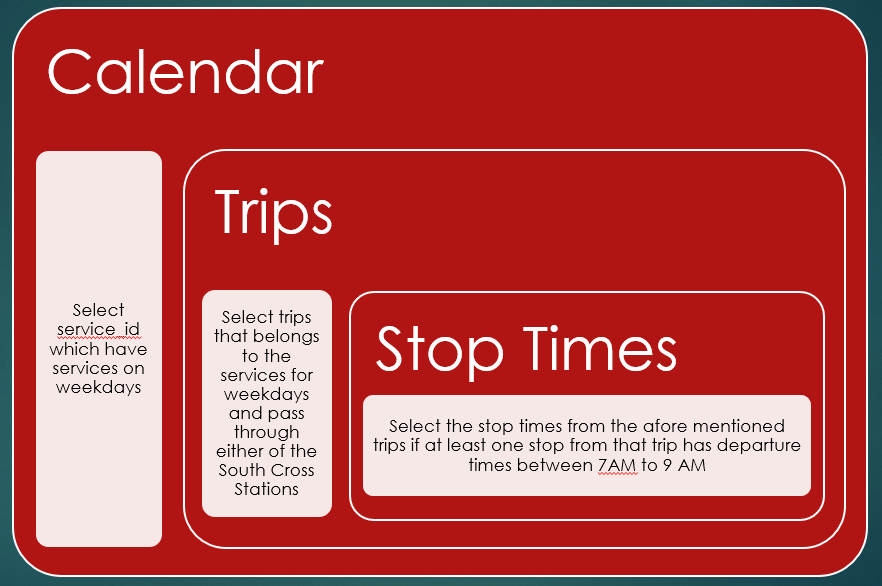

In [54]:
#getting stop_id for southern cross railway station
df_stops[df_stops['stop_name'].str.contains("Southern Cross Railway")]

,stop_id,stop_name,stop_lat,stop_lon,key
209,22180,Southern Cross Railway Station (Melbourne City),-37.817936,144.951411,1


Southern Cross Railway Station (Melbourne City) have stop_id  22180. lets filter and get the trip_ids for them.

In [55]:
un_trip_id = list(df_stop_times[((df_stop_times['stop_id']==22180))].trip_id.unique())
len(un_trip_id)

12658

There are 12658 trips that pass through either of the 'Southern Cross Station'. 

Now let us check for trips that have departures between 7AM and 9AM

In [56]:
time_trip_id = list(df_stop_times[(pd.to_numeric(df_stop_times['departure_time'].str[:2])<9)&
                                  (pd.to_numeric(df_stop_times['departure_time'].str[:2])>=7)].trip_id.unique())
len(time_trip_id)

5040

There are only 5040 trips that run during these time periods. 

- Now we have three different lists and have to get the elements that are present in all these three lists.

In [57]:
consol_trips = list(set(trips_wd_id) & set(un_trip_id) & set(time_trip_id))
len(consol_trips)

415

There are 415 trips that are intersection of all the conditions. Let us filter the stop times for these trips and then proceed with our analysis.

In [58]:
df_stop_times_filtered = df_stop_times[df_stop_times['trip_id'].isin(consol_trips)]
df_stop_times_filtered.shape

(8361, 9)

Now we have around 8 thousand rows of information in the stop times that is relevant to us. Our next focus should be to see the time taken between the station to the south cross station. We will write function time_dif that takes the departure at the station and arrival at the South cross station and finds the difference in times in minutes.


In [59]:
# function to get the time difference in minutes.
def time_dif(D,A):
    seconds = (int(A[:2])-int(D[:2]))*3600+(int(A[3:5])-int(D[3:5]))*60+(int(A[6:8])-int(D[6:8]))
    return seconds/60
    

Now that we have the time function let us get all the distinct stops in the original real estate file and use it.

In [60]:
uniq_stops = list(df_re5.Train_station_id.unique())
len(uniq_stops)

171

We will go through each of the unique stops and do the following.

- Then we will get all the trips that have both the stop id from uniq_stops and the particular southern cross station.
- For each of those trips we will get the time difference between the departure at the unique stop and at the arrival of southern corss station.
- For Each station we will append all of these into a list for different trips if the difference is greater than 0, IF the difference is less than 0 it implies the trip is from southern cross to our station and not the other way around.
- we will take average for each of the list and append it to the avg_time list.
- If there are no items to average that implies no direct connection and we will save the number of direct trips in the direct trip list
- We will create a dataframe from these (stop_id, avg-time, no of direct trips), We will add a new column transfer flag based on the number of direct trips.
- Merge it with existing realestate information using stop_id as the key

In [61]:
stop_new = []
avg_time = []
direct_trip = []
un_trips2 = list(df_stop_times_filtered[(df_stop_times_filtered['stop_id']==22180)]['trip_id'].unique())
for i in uniq_stops:
    south_code = 22180
    un_trips1 = list(df_stop_times_filtered[df_stop_times_filtered['stop_id']==i]['trip_id'].unique())
    un_tripsf = set(un_trips1).intersection(set(un_trips2))
    lista = []
    for j in un_tripsf :
        temp_df = df_stop_times_filtered[df_stop_times_filtered['trip_id']==j]
        south_time = temp_df['arrival_time'][temp_df['stop_id'] == south_code]
        
        south_time = temp_df[temp_df['stop_id'] == south_code]['arrival_time'].values[0]
        stop_seq = temp_df.loc[temp_df['stop_id'] == i, 'departure_time'].values[0]
        if((int(stop_seq[:2])>=7)&(int(stop_seq[:2])<9)):
            difference = time_dif(stop_seq,south_time)
            if(difference>=0):
                lista.append(difference)
    if(len(lista)>0):
        stop_new.append(i)
        avg_time.append(sum(lista)/len(lista))
        direct_trip.append(len(lista))
        #print(i,sum(lista)/len(lista))
    else:
        stop_new.append(i)
        avg_time.append(0)
        direct_trip.append(0)
        #print(i,0)

    

In [62]:
df_times = pd.DataFrame(list(zip(stop_new,avg_time,direct_trip))
                        ,columns =['Train_station_id', 'travel_min_to_CBD','no_of_trips'])

In [63]:
df_times['Transfer_flag']=df_times.apply(lambda x: 0 if x['no_of_trips']>0 else 1,axis=1)

In [64]:
df_times.head()

,Train_station_id,travel_min_to_CBD,no_of_trips,Transfer_flag
0,19958,0.000000,0,1
1,19910,0.000000,0,1
2,19969,23.200000,5,0
3,52095,41.714286,7,0
4,19950,0.000000,0,1


Now that we have the last two columns, we will merge it with original dataframe and remove extra columns.

- After that arrange the columns in the required order and write it to a csv file

In [65]:
df_re6 = pd.merge(df_re5, df_times, on="Train_station_id").drop(columns=['no_of_trips','index'])

In [66]:
df_re6.rename(columns = {'property_id':'Property_id'}, inplace = True)

In [67]:
cols = ['Property_id',
 'lat',
 'lng',
 'addr_street',
 'suburb',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
 'School_id',
 'Distance_to_school',
 'Train_station_id',
 'Distance_to_train_station',
 'travel_min_to_CBD',
 'Transfer_flag',
 'Hospital_id',
 'Distance_to_hospital',
 'Recreation_centre_id',
 'Distance_to_Recreation_centre']
df_re6 = df_re6[cols]

In [68]:
df_re6.to_csv('32157738_A3_solution.csv',index=False)
df_re6.head()

,Property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,School_id,Distance_to_school,Train_station_id,Distance_to_train_station,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Recreation_centre_id,Distance_to_Recreation_centre
0,83935,-37.849716,144.989212,36A Charles Street,Prahran,23400000.0,house,2009,3,3,...,1134,7.815530,19958,0.060981,0.0,1,hospital_155,0.436330,BAYSID12373,7.059544
1,83870,-37.850706,144.996295,31 Regent Street,Prahran,3240000.0,house,2012,3,1,...,1025,7.711999,19958,0.580235,0.0,1,hospital_097,0.372324,BAYSID12373,6.977106
2,83963,-37.854055,144.984394,3a Henry Street,Windsor,18190000.0,house,2012,3,2,...,1134,7.349235,19958,0.696252,0.0,1,hospital_155,0.938258,BAYSID12373,6.590720
3,69284,-37.839373,145.033180,7 Talbot Crescent,Kooyong,13900000.0,house,2011,3,3,...,7650,9.193243,19910,0.069902,0.0,1,hospital_127,1.605058,BAYSID12334,8.792508
4,68815,-37.842711,145.036855,14 Norford Grove,Kooyong,13640000.0,house,2012,2,1,...,7650,8.911473,19910,0.424079,0.0,1,hospital_168,1.629697,BAYSID12334,8.567529


# Data Reshaping

Linear model has certain assumptions that needs to be satisfied if we need a more accurate prediction of the information. The basic assumptions of linear model ***(Simple Linear Regression, n.d.)*** are :

- Linearity: The relationship between X and the mean of Y is linear. 
- Homoscedasticity: The variance of residual is the same for any value of X.
- Independence: Observations are independent of each other.
- Normality: For any fixed value of X, Y is normally distributed.

Here Y represent the output and X represents the predictors.

**Features and Target:**
In this project we chose ```price``` as the target and ```Distance_to_school```, ```travel_min_to_CBD``` and ```Distance_to_Recreation_centre```  as our features. 
A resulting linear model would look like 

$$price = \beta_0 + \beta_1*Distance\_to\_school + \beta_2*travel\_min\_to\_CBD+\beta_3*distance\_to\_Recreation\_centre$$

To build a perfect model we have to make some adjustments to the above variables so that they will follow the assumptions for linear model.

### Data Transformations

Data transformation is the process of changing the format, structure, or values of data so that it fits the destination system. In the context of model building, data transformation is changing the format of features in a model in a way to align with the assumptions underlying the model.

#### Types of Transformations


**Log Transformations:** The log transformation can be used to make highly skewed distributions less skewed. It can be used on highly right skewed information to make it more normal.

**Root Transformation:** The square root transformation or power to 1/2 is a moderate transformation technique, weaker than log. This can be used for moderately transformed data.

**Power Transformation:** This is used to improve variablity of the variables. They are ideal for fixing left skewed data.

**Box Cox Transformation:** This transformation is applied to non-normal dependent variables to obtain a normal shape. 
$$y(\lambda)=\left\{\begin{array}{11}
\frac{y^\lambda-1}{\lambda} & \text { if }\lambda \neq 0 \\
logy & \text { if } \lambda = 0 
\end{array}\right.$$

### Linearity

Linearity between predictors and the target is the first condition. In our case the predictors are Distance_to_school, travel_min_to_CBD, Distance_to_Recreation_centre. and the target is price. Let us plot scatter plots to see if that holds true.

In [69]:
# Required features
df_reshape = df_re6.loc[:,['Distance_to_school','travel_min_to_CBD','Distance_to_Recreation_centre','price']]

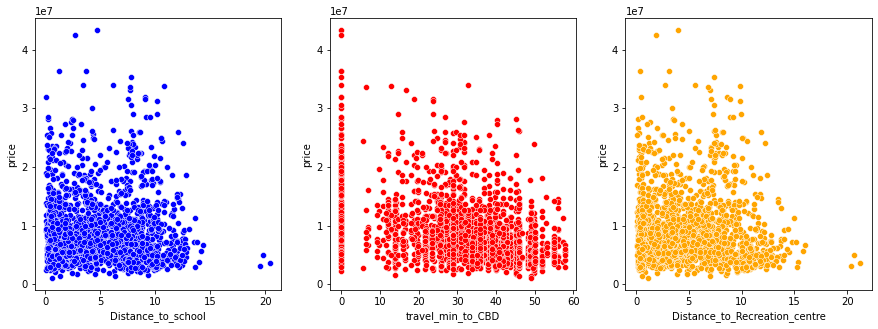

In [70]:
fig, ax = plt.subplots(1, 3) 
sns.scatterplot(data=df_reshape, x="Distance_to_school" , y="price", color ="blue", ax=ax[0])
sns.scatterplot(data=df_reshape, x="travel_min_to_CBD" , y="price",color ="red", ax=ax[1])
sns.scatterplot(data=df_reshape, x="Distance_to_Recreation_centre" , y="price",color ="orange", ax=ax[2])

fig.set_figheight(5) 
fig.set_figwidth(15) 

**Observations:**

In general houses that are nearer to school and recreation centre and least travel time to CBD should have higher price. There is no clear. 

- There is no clear pattern in the travel time plot.
- If we look at the distance to school plot we can see that the higher priced houses decrease as the distance increased but it is not very clear.
- If we look at the distance to recreation centre plot we can see that the higher priced houses decrease as the distance increased but it is not very clear

### Normality of variables

We observe the normality of curves for each of these and see if there is any skewness and apply transformations as needed.



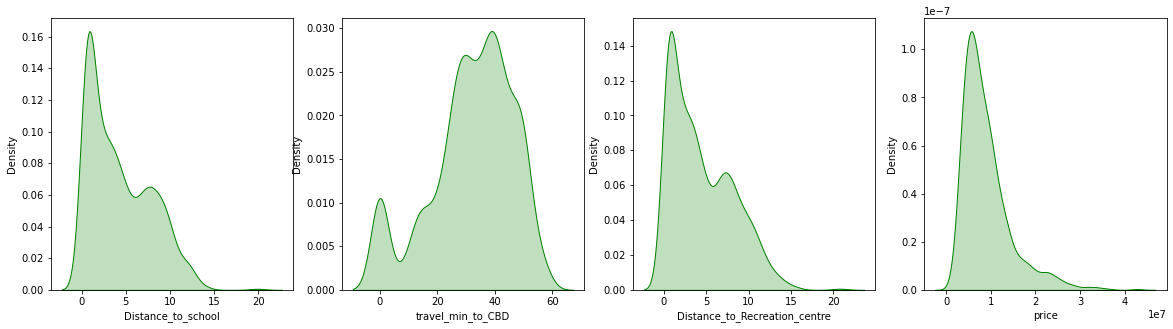

In [71]:
fig, ax = plt.subplots(1, 4) 

# Plotting histograms for original data

sns.kdeplot(df_reshape.Distance_to_school,fill=True, color = "green", ax= ax[0]) 


sns.kdeplot(df_reshape.travel_min_to_CBD,fill=True, color = "green", ax= ax[1]) 


sns.kdeplot(df_reshape.Distance_to_Recreation_centre,fill=True, color = "green", ax= ax[2]) 


sns.kdeplot(df_reshape.price,fill=True, color = "green", ax= ax[3]) 


# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(20) 

**Observations:**

**Distance to school:** It is slightly right skewed with a minor bump in the middle. Since it is right skewed we can apply root. However, let us see how each of the transformations effected the information.

**Travel time to CBD:** travel_min_to_CBD has a high value for zero but except that it looks like a normal distribution that is slightly left skewed. We will use power transformation with a low value like 1.4 .

**Distance to Recreation centre:** Distance_to_Recreation_centre is skewed towards right and we can use root transformation to achieve better normalization.

**Price:** Price is skewed to right so we can Box-cox or root. let us use box-cox to check how that changes the data.

#### Distance to school

Let us check how distance to school changes up on each transformation. From the plots we can see that root and boxcox are showing better result.

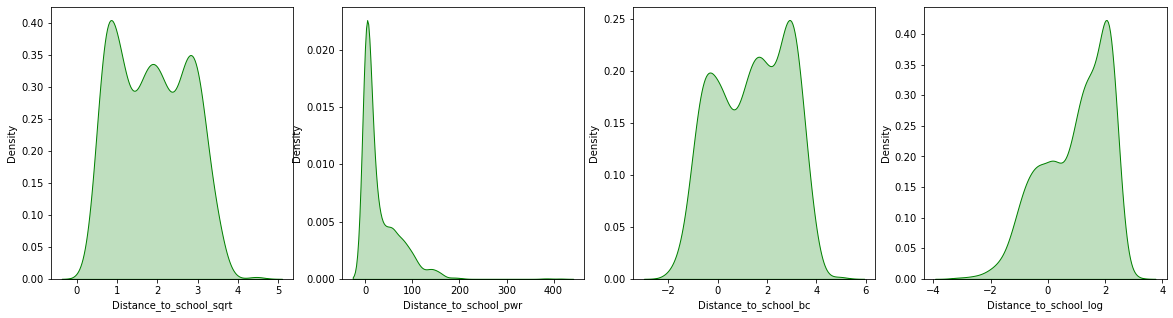

In [72]:
df_reshape['Distance_to_school_sqrt'] = df_reshape.apply(lambda x: math.sqrt(x['Distance_to_school']),axis=1) 

df_reshape['Distance_to_school_pwr'] = df_reshape.apply(lambda x: x['Distance_to_school']**2,axis=1) 

df_reshape['Distance_to_school_log'] = df_reshape.apply(lambda x: math.log(x['Distance_to_school']),axis=1) 

df_reshape['Distance_to_school_bc'] = stats.boxcox(df_reshape['Distance_to_school'])[0]

#sns.kdeplot(df_reshape.Distance_to_school_sqrt,fill=True, color = "green") 

fig, ax = plt.subplots(1, 4) 

# Plotting histograms for original data

sns.kdeplot(df_reshape.Distance_to_school_sqrt,fill=True, color = "green", ax= ax[0]) 


sns.kdeplot(df_reshape.Distance_to_school_pwr,fill=True, color = "green", ax= ax[1]) 


sns.kdeplot(df_reshape.Distance_to_school_bc,fill=True, color = "green", ax= ax[2]) 

sns.kdeplot(df_reshape.Distance_to_school_log,fill=True, color = "green", ax= ax[3]) 

# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(20) 

#### Travel time to CBD

Let us check how time to CBD changes up on each transformation. From the plots we can see that power transformation makes it least skewed.

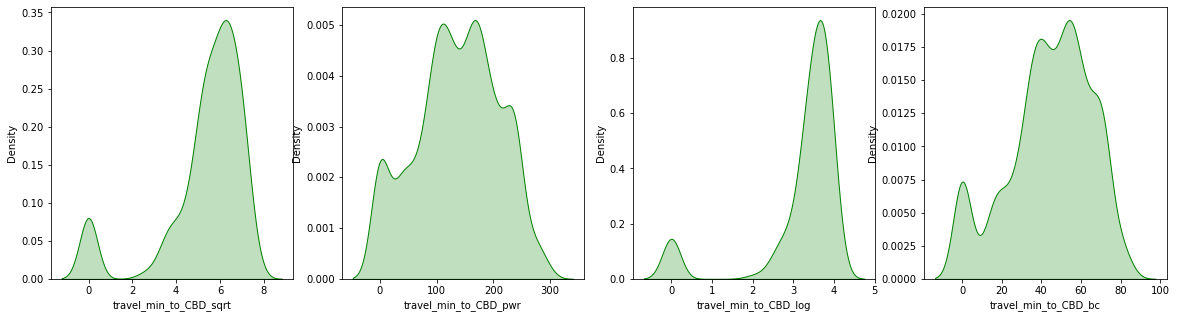

In [73]:
df_reshape['travel_min_to_CBD_sqrt'] = df_reshape.apply(lambda x: math.sqrt(x['travel_min_to_CBD']),axis=1) 

df_reshape['travel_min_to_CBD_pwr'] = df_reshape.apply(lambda x: x['travel_min_to_CBD']**1.4,axis=1) 

df_reshape['travel_min_to_CBD_log'] = df_reshape.apply(lambda x: math.log(x['travel_min_to_CBD']+1),axis=1) 

df_reshape['travel_min_to_CBD_bc'] = stats.boxcox(df_reshape['travel_min_to_CBD']+1)[0]

#sns.kdeplot(df_reshape.Distance_to_school_sqrt,fill=True, color = "green") 

fig, ax = plt.subplots(1, 4) 

# Plotting histograms for original data

sns.kdeplot(df_reshape.travel_min_to_CBD_sqrt,fill=True, color = "green", ax= ax[0]) 


sns.kdeplot(df_reshape.travel_min_to_CBD_pwr,fill=True, color = "green", ax= ax[1]) 


sns.kdeplot(df_reshape.travel_min_to_CBD_log,fill=True, color = "green", ax= ax[2]) 

sns.kdeplot(df_reshape.travel_min_to_CBD_bc,fill=True, color = "green", ax= ax[3]) 

# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(20) 

#### Distance to recreation centre

Let us check how distance to recreation centre changes up on each transformation. From the plots we can see that sqrt transformation makes it least skewed.

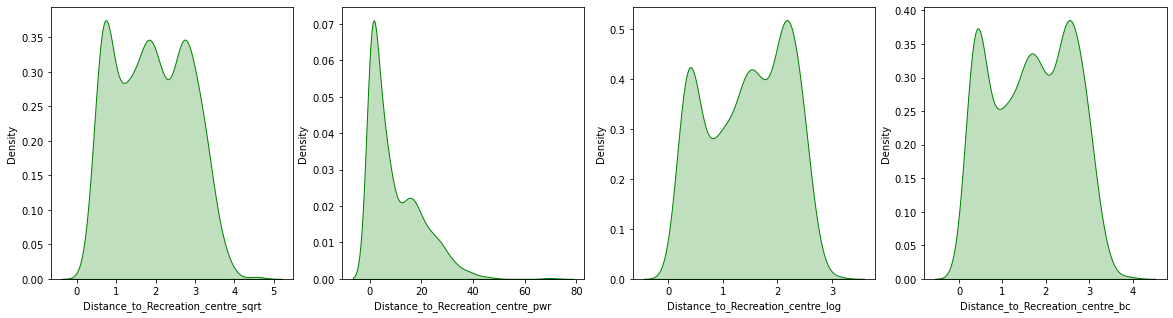

In [74]:
df_reshape['Distance_to_Recreation_centre_sqrt'] = df_reshape.apply(lambda x: math.sqrt(x['Distance_to_Recreation_centre']),axis=1) 

df_reshape['Distance_to_Recreation_centre_pwr'] = df_reshape.apply(lambda x: x['Distance_to_Recreation_centre']**1.4,axis=1) 

df_reshape['Distance_to_Recreation_centre_log'] = df_reshape.apply(lambda x: math.log(x['Distance_to_Recreation_centre']+1),axis=1) 

df_reshape['Distance_to_Recreation_centre_bc'] = stats.boxcox(df_reshape['Distance_to_Recreation_centre']+1)[0]

#sns.kdeplot(df_reshape.Distance_to_school_sqrt,fill=True, color = "green") 

fig, ax = plt.subplots(1, 4) 

# Plotting histograms for original data

sns.kdeplot(df_reshape.Distance_to_Recreation_centre_sqrt,fill=True, color = "green", ax= ax[0]) 


sns.kdeplot(df_reshape.Distance_to_Recreation_centre_pwr,fill=True, color = "green", ax= ax[1]) 


sns.kdeplot(df_reshape.Distance_to_Recreation_centre_log,fill=True, color = "green", ax= ax[2]) 

sns.kdeplot(df_reshape.Distance_to_Recreation_centre_bc,fill=True, color = "green", ax= ax[3]) 

# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(20) 

#### Price

Let us check how price changes up on each transformation. From the plots we can see that box-cox transformation makes it least skewed.


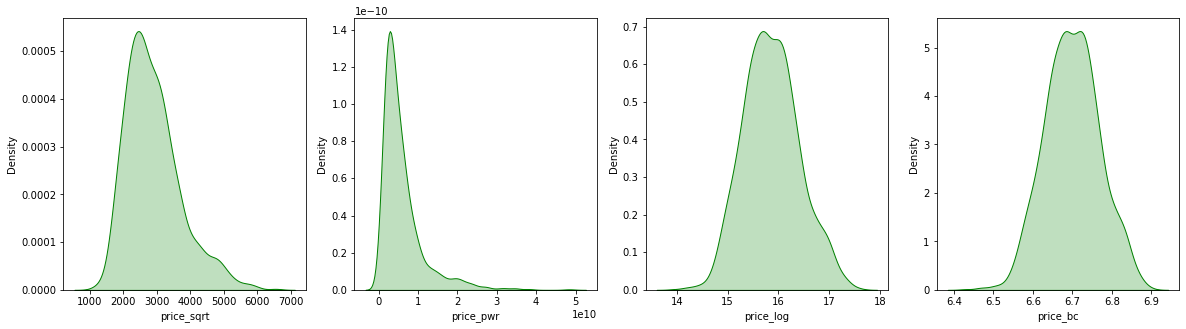

In [75]:
df_reshape['price_sqrt'] = df_reshape.apply(lambda x: math.sqrt(x['price']),axis=1) 

df_reshape['price_pwr'] = df_reshape.apply(lambda x: x['price']**1.4,axis=1) 

df_reshape['price_log'] = df_reshape.apply(lambda x: math.log(x['price']+1),axis=1) 

df_reshape['price_bc'] = stats.boxcox(df_reshape['price']+1)[0]

#sns.kdeplot(df_reshape.Distance_to_school_sqrt,fill=True, color = "green") 

fig, ax = plt.subplots(1, 4) 

# Plotting histograms for original data

sns.kdeplot(df_reshape.price_sqrt,fill=True, color = "green", ax= ax[0]) 


sns.kdeplot(df_reshape.price_pwr,fill=True, color = "green", ax= ax[1]) 


sns.kdeplot(df_reshape.price_log,fill=True, color = "green", ax= ax[2]) 

sns.kdeplot(df_reshape.price_bc,fill=True, color = "green", ax= ax[3]) 

# rescaling the subplots 
fig.set_figheight(5) 
fig.set_figwidth(20) 

**Observations:** 
We will be using the following transformations
- Square root for distance_to_school 
- Power transformation for travel_min_to_CBD
- log transformation for Distance_to_recreation_centre
- Boxcox transformation for Price.

#### Normality of residuals:

Normality of the residuals is one of the assumptions of building a linear model. We can verify this by applying the linear model on non transformed predictors and then do it on transformed predictors and compare.

Residual plot is taken by building a linear model of the data. The data is split into train and test (75-25) for validation. The test data is used to calculate residuals and these are plotted to verify the normality.
$$residual = original\_y - predicted\_y$$

In [76]:
def residual_plot(data,features,output):
    X = data.loc[:,features]
    y = output

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    regr_model = linear_model.LinearRegression()
    regr_model.fit(X_train, y_train)
    y_pred= regr_model.predict(X_test)
    print("R2 score:",r2_score(y_test, y_pred))

    X_resid = pd.DataFrame(X_test)
    X_resid['y_pred'] = y_pred
    X_resid['price_true'] = y_test
    X_resid['price_pred'] = y_pred
    X_resid['residuals'] = X_resid.price_true-X_resid.price_pred
    
    sns.kdeplot(X_resid['residuals'],fill=True, color = "green") 
   

R2 score: 0.1509130479467593


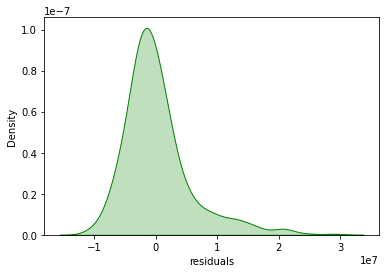

In [77]:
#residual plot of non transfromed data
residual_plot(df_reshape,['Distance_to_school','travel_min_to_CBD','Distance_to_Recreation_centre'],df_reshape.price)

R2 score: 0.14623016500943165


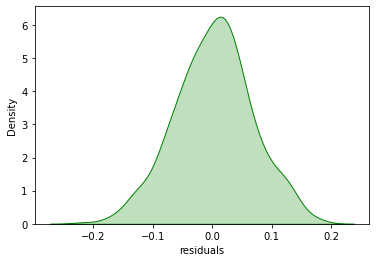

In [78]:
#residual plot for transformed data
residual_plot(df_reshape,['Distance_to_school_sqrt','travel_min_to_CBD_pwr','Distance_to_Recreation_centre_sqrt'],df_reshape.price_bc)

#### Observation of residual plot:
The residual plot is right skewed when the non-transformed data is supplied. Ater applying the transformation data to linear model, there is an improvement in the normality of the data which shows that the features are more suitable for linear model. However the R2 value increased.

### Data Normalization

In simplest words, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging (Wikipedia contributors, 2021a). There are two major normalisation ways.

- **min-max normalization:** We will scale the data so that the minimum value represented by 0 and maximum value is represented by 1.

$$X=\frac{x - min(x)}{max(x)-min(x)}$$

- **Standardization:** We will be scaling the distribution with mean 0 and standard deviation of 1. Values will be scaled to [-1,1]

$$X=\frac{x-\mu}{\sigma}$$

Normalization is applied to all the variables to reduce the variance. This is done after transformation as scaling does not change the shape of the data, but gets all the variables to a single scale.

In [79]:
# Applying min max scaling to the transformed data
minmax_scale = preprocessing.MinMaxScaler().fit(df_reshape[
    ['Distance_to_school_sqrt','travel_min_to_CBD_pwr','Distance_to_Recreation_centre_sqrt', 'price_bc']])
minmax = minmax_scale.transform(df_reshape[
    ['Distance_to_school_sqrt','travel_min_to_CBD_pwr','Distance_to_Recreation_centre_sqrt', 'price_bc']])

In [80]:
df_minmax= pd.DataFrame(minmax)
df_minmax.columns = ['Distance_to_school_scaled','travel_min_to_CBD_scaled','Distance_to_Recreation_centre_scaled', 'price_scaled']
# df_minmax.head()

R2 score: 0.14623016500943153


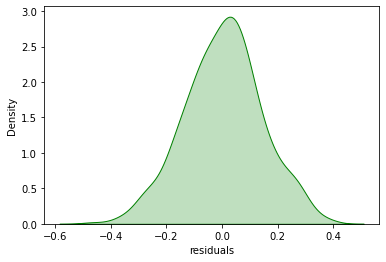

In [81]:
# Residual plot of scaled data
residual_plot(df_minmax,
              ['Distance_to_school_scaled','travel_min_to_CBD_scaled','Distance_to_Recreation_centre_scaled'],df_minmax.price_scaled)

### Observations after scaling
Scaling did not effect the model much and has minimum effect, however it imporved R2 value slightly. It is always advised to do the scaling after transformation based on the transformed values.

## Conclusion

#### Data Integration:

Data Integration is a very integral part of the data science and it helps in integrating information that is in various formats and from various sources. In a project like this where the data is from mulitple sources and mulitple formats such as excel, csv, Json, html etc., It is important to integrate them all into a single format and then use it for further analysis. 

#### Data Reshaping:

Data Reshaping is changing data so that it fits well with the model. In this project we used a linear model and we reshape the data based on the assumptions we make for a linear model. We used transformations such as box-cox, power, root, log to see if they make the model better.

## References

- Wikipedia contributors. (2021b, April 17). Shapefile. Wikipedia. https://en.wikipedia.org/wiki/Shapefile
- PTV Timetable and Geographic Information - GTFS - Victorian Government Data Directory. (n.d.). DATA VIC. Retrieved June 8, 2021, from https://discover.data.vic.gov.au/dataset/ptv-timetable-and-geographic-information-2015-gtfs
- Simple Linear Regression. (n.d.). Boston University. Retrieved June 10, 2021, from https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html
- Wikipedia contributors. (2021a, March 18). Normalization (statistics). Wikipedia. https://en.wikipedia.org/wiki/Normalization_(statistics)
- What is Data Integration? Examples and Use Cases. (n.d.). Stitch. Retrieved June 10, 2021, from https://www.stitchdata.com/data-integration/